# **Project Name**    -  **Cardiovascular Risk Prediction**


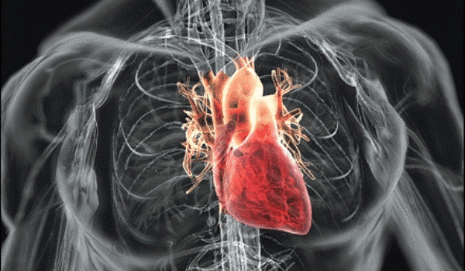

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Mihir Gupta
##### **Team Member 2 -** Shubhro Jyoti Das

# **Project Summary -**

Given is a dataset of 3400 individuals which has information about different biological parameters which like blood pressure, diabetes, Cholesterol, BMI and other relevant information like their smoking details and other disease history related to heart such as stroke and hypertention. The goal of the project was to identify predict outcomes related to risk of heart disease in next ten years using the provided data. This project compared the accuracy of these models and found that the Random Forest model was the best among all, in terms of its ability to accurately predict the risk of heart disease.

# **GitHub Link -**

https://github.com/Mihirgupta2001/Classification-Capstone-Project

# **Problem Statement**


**The classification goal is to predict wheather the patient has 10 year risk of future coronary heart diesease(CHD).**


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import math
from scipy.stats import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble


import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/data_cardiovascular_risk.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated

<bound method DataFrame.duplicated of         id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0  

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().value_counts()

id     age    education  sex    is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
False  False  False      False  False       False       False   False            False         False     False    False  False  False  False      False    False         2927
                                                                                                                                                  True     False          262
              True       False  False       False       False   False            False         False     False    False  False  False  False      False    False           77
              False      False  False       False       True    False            False         False     False    False  False  False  False      False    False           42
                                                        False   False            False         False     True     False  False  False  Fal

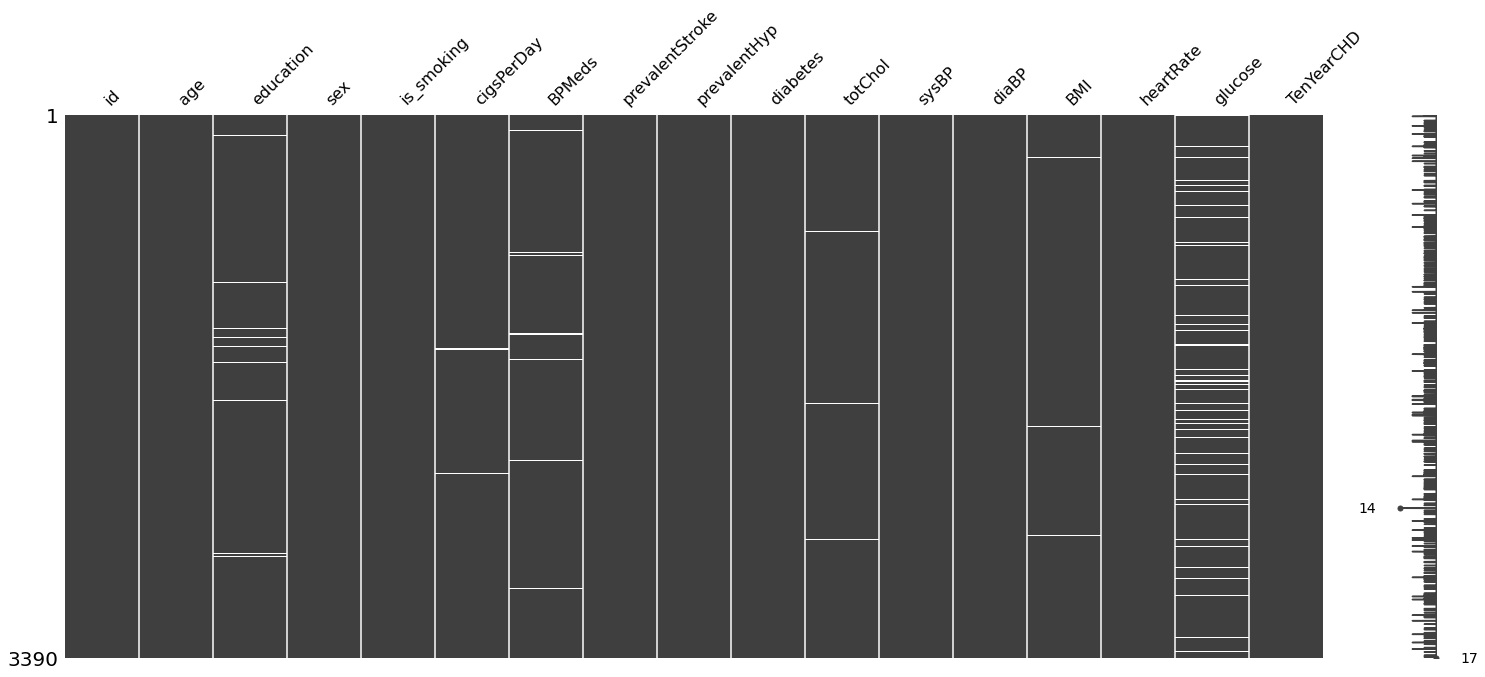

In [9]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

The dataset has 17 columns and 131894 rows, altthough we have a good amount of data but it can be seen that a vast amount of our data contains missing values and duplicated values which needs to be dealt with moving forward.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

Sex - Gender of the person

Age - age of the person

is_smoking - whether the person is smoking or not

Cigs_Per_Day - Cigarettes smoked per day

BP_Meds - Whether taking any medicine for BP or not

Prevalent Stroke - if the patient has a history of smoke 

Prevalent Hyp - if the patient has a history of hypertension 

Diabetes - Patient is diabetic or not

TotChol - Cholestrol Measure

sysBP - Systolic BP

diaBP - Diastolic BP

BMI - Body Mass Index

HeartRate - HeartRate Measure


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
feature = df.describe()
unique_values = []
for col in feature:
  unique_values.append(int(pd.DataFrame(df[col].unique()).count()))
  

#id column is just like index so let's drop that
unique_values = unique_values[1:]
feature_name = list(df.columns)
feature_name = feature_name[1:]
unique_dict = dict(zip(feature_name, unique_values))
print(f"unique elements in each feature are as follows: {unique_dict}")

unique elements in each feature are as follows: {'age': 39, 'education': 4, 'sex': 32, 'is_smoking': 2, 'cigsPerDay': 2, 'BPMeds': 2, 'prevalentStroke': 2, 'prevalentHyp': 240, 'diabetes': 226, 'totChol': 142, 'sysBP': 1259, 'diaBP': 68, 'BMI': 132, 'heartRate': 2}


## **3**. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# We won't be needing education and id columns for our analysis, so let's drop that
df.drop(columns = {'id','education'},inplace = True)

# Dropping duplicate values
df.drop_duplicates(inplace = True)

#Let's check information on our data frame now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 423.8+ KB


In [14]:
# Converting is_smoking and sex into categorical variables
df['sex']=df['sex'].astype('category').cat.codes
df['is_smoking']=df['is_smoking'].astype('category').cat.codes

In [15]:
# Our data is very much limited so let's not consider dropping null values

# creating a function to replace NaN values with column mean
def replace_nan_with_column_mean(df, col_name):
    df[col_name].fillna(df[col_name].mean(), inplace=True)
    return df

#Let's try to fix null values in cigsperday
#creting data frame for the observation
relevant_df = df[['cigsPerDay','is_smoking']]
#dropping null values
relevant_df.dropna(inplace = True)
# delete all rows with column 'CigsPerDay' has value 0 and also is_smoking
indexAge = relevant_df[relevant_df['cigsPerDay'] == 0.0].index
relevant_df.drop(indexAge , inplace=True)
#imposting libraries to calculate mode
import statistics
from statistics import mode
#calculating and storing mode value
mode_value = float(relevant_df['cigsPerDay'].mode())

#replacing null values with mode value
if (relevant_df['is_smoking'] == 'YES').any():
  df.cigsPerDay.fillna(mode_value,inplace = True)
else:
  df.cigsPerDay.fillna(0.0,inplace = True)

# Let's deal with BPmeds
# It is safe to say a person where sysBP and diaBP is beyond a certain limit will be getting BPmeds
relevant_df = df[['BPMeds','sysBP','diaBP']]
# It is known that low BP is considered below 90/60 and high is considered above 140/90, let's add them and make a normal range for 150 - 230
relevant_df['sys + dia'] = relevant_df['sysBP'] + relevant_df['diaBP']
# Now drop sysBP and diaBP
relevant_df.drop(columns = ['sysBP','diaBP'],inplace = True )
# Fill the nan values with 0 if it is between 150 and 230 or else put 0
if (relevant_df['sys + dia'] <= 230).any() & (relevant_df['sys + dia'] >=150 ).any():
  relevant_df.BPMeds.fillna(1.0,inplace = True)
else:
  relevant_df.BPMeds.fillna(0.0,inplace = True)

# storing the updated BPMeds column in actual dataframe 
df['BPMeds'] = relevant_df['BPMeds']


# replacing NaN values in total cholestrol,glucose,BMI and heartRate
df=replace_nan_with_column_mean(df, 'totChol')
df=replace_nan_with_column_mean(df, 'glucose')
df=replace_nan_with_column_mean(df, 'BMI')
df=replace_nan_with_column_mean(df, 'heartRate')

# Checking updated column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int8   
 2   is_smoking       3390 non-null   int8   
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), int8(2)
memory usage: 377.4 KB


### What all manipulations have you done and insights you found?

Dropped irrelavant columns, converted is_smoking and sex into categoroical variables and took care of the missing values

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

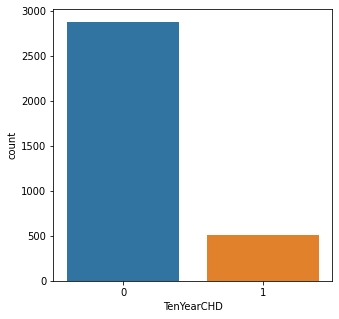

In [16]:
#Let's explore our dependent variable selling price
plt.figure(figsize=(5,5))
sns.countplot(x=df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

By the above bar graph we compared the number of people not having any heart disease risk with people having heart disease risk.

##### 2. What is/are the insight(s) found from the chart?

It was observed that there is a vast difference between the population of people not having heart disease risk and people having heart disease risk. 

#### Chart - 2

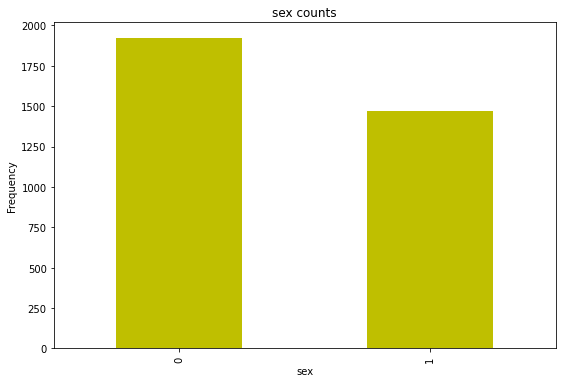

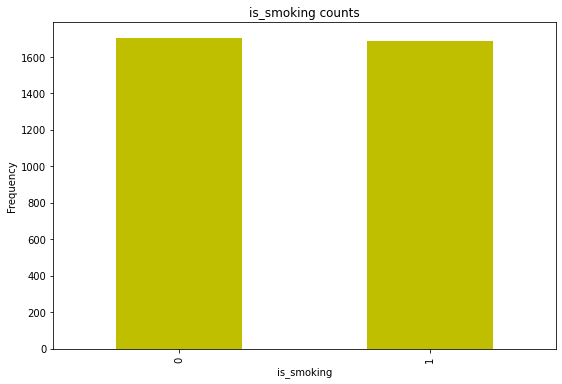

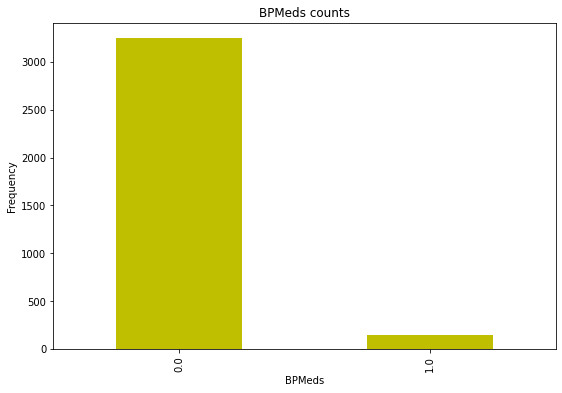

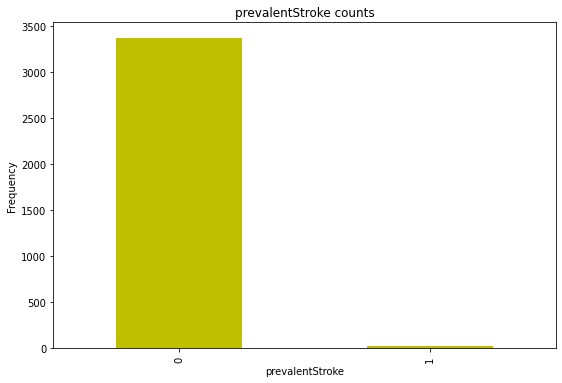

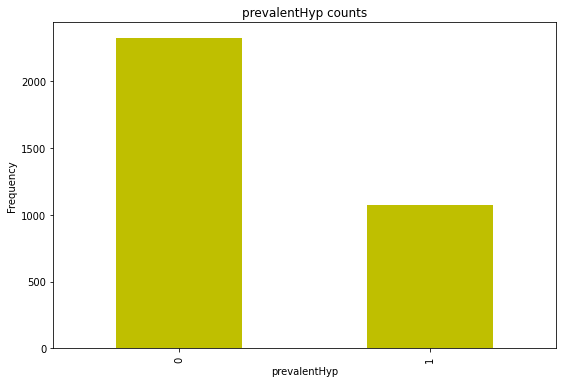

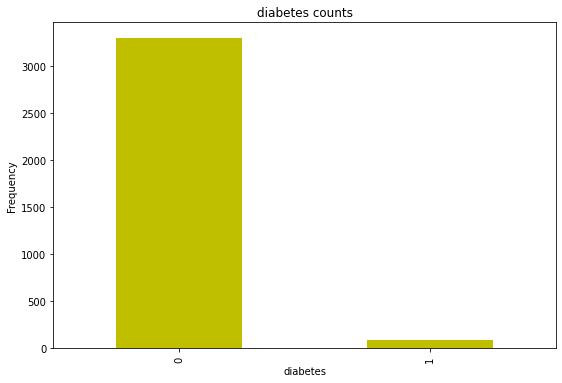

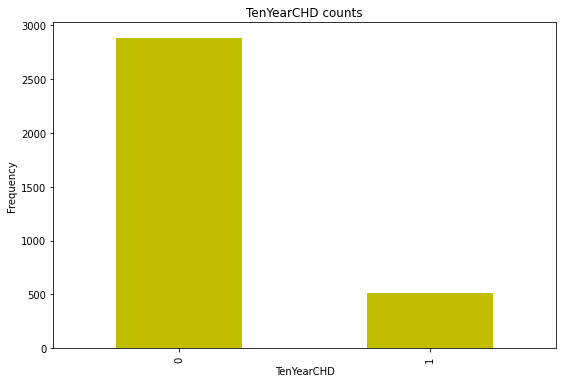

In [17]:
categorical_features = df[['sex', 'is_smoking','BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']]

# plot a bar plot for each categorical feature count  
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='y')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

To identify important categorical features.

##### 2. What is/are the insight(s) found from the chart?

It was observed that features like stroke count, diabetes count and BP meds are highly biased.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Biased features can cause underfitting of the ML algorithm, so we'll have to implement sampling techniques to mitigate it.

#### Chart - 3


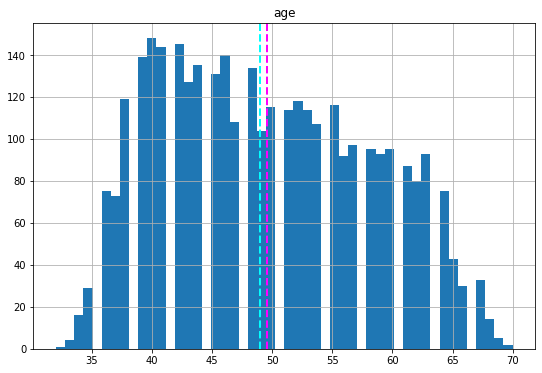

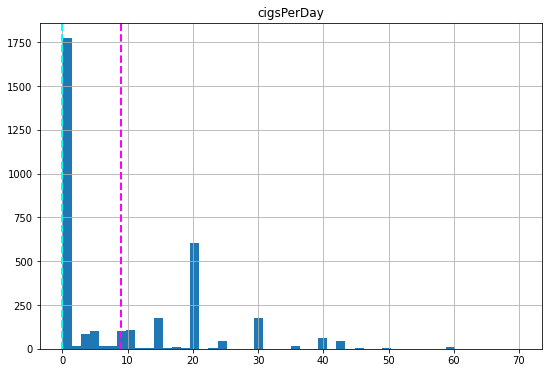

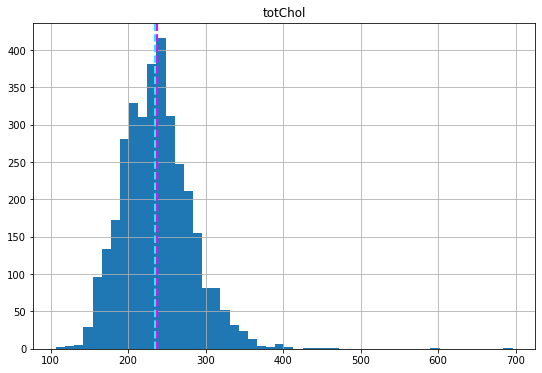

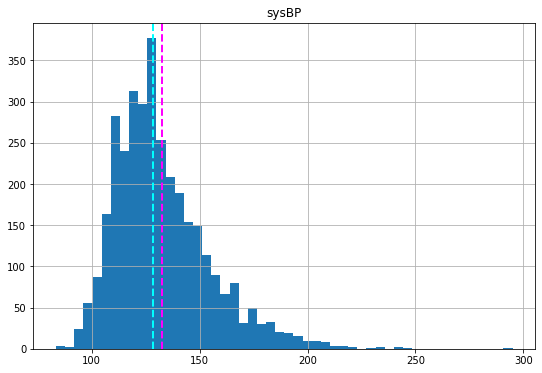

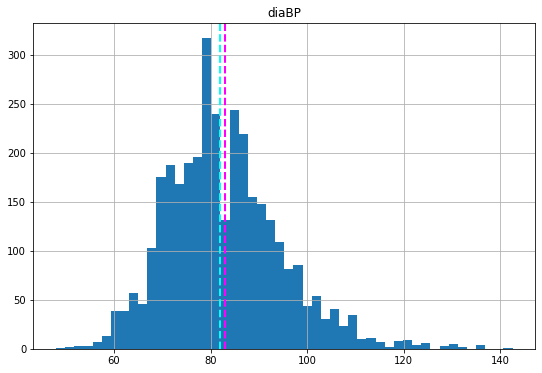

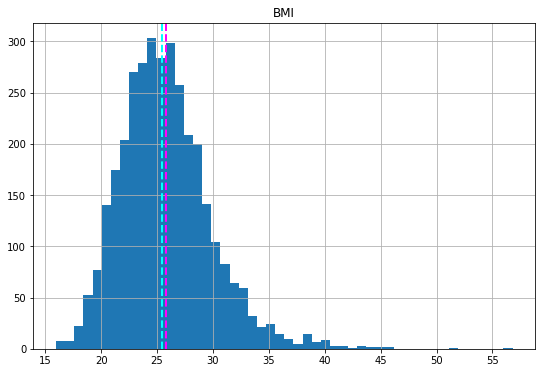

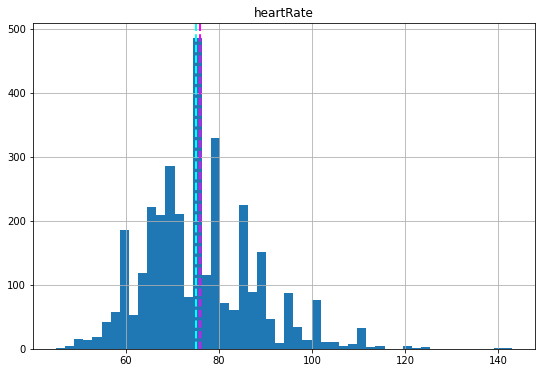

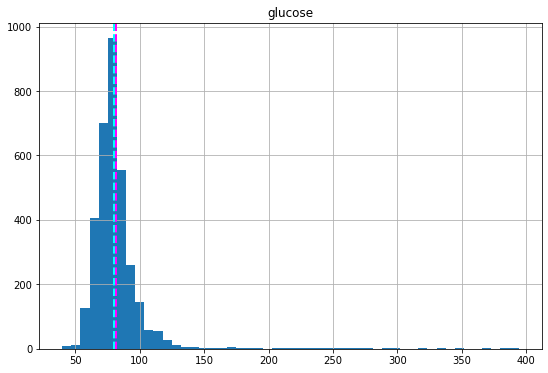

In [18]:
continous_features = df[['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]
continous_features

#Plotting histogram for continous features
for col in continous_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the continuous features.

##### 2. What is/are the insight(s) found from the chart?

It is observed that the continuous fatures are normally distributed and is right skewed except feature "age".




#### Chart - 4

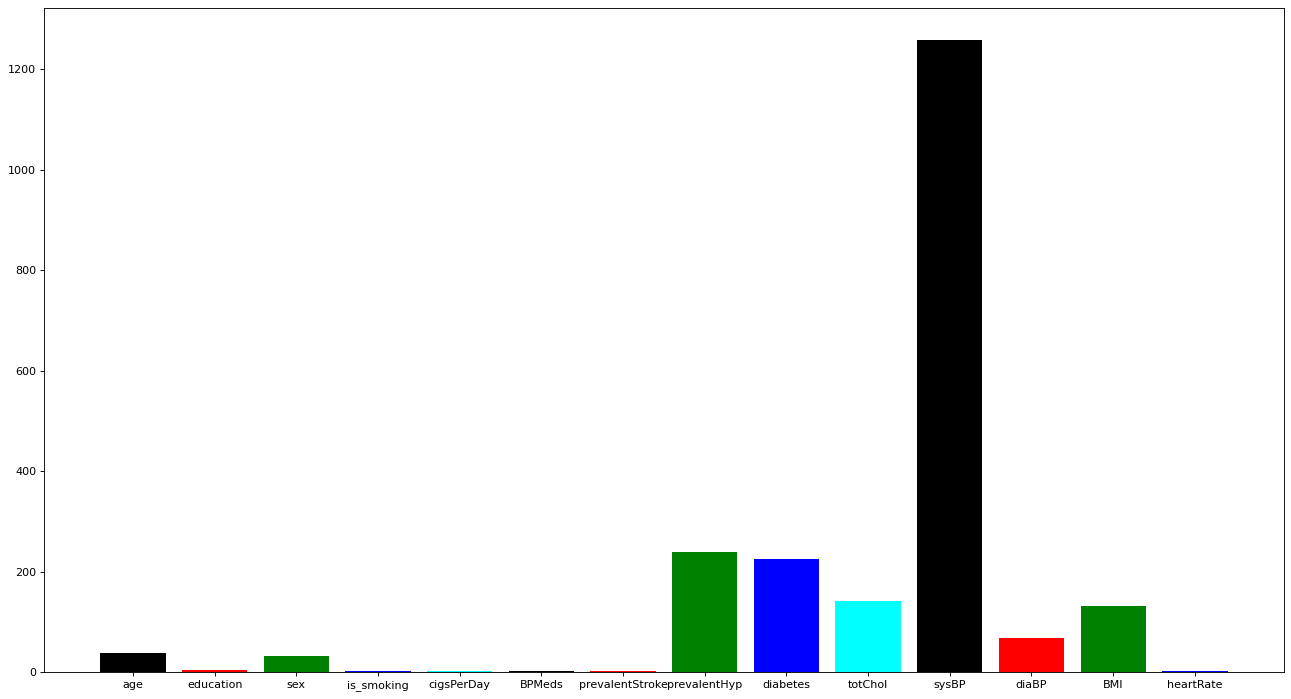

In [19]:
#plotting unique values in each variable with a bar graph
names = list(unique_dict.keys())
values = list(unique_dict.values())

# importing library to change the figure size
from matplotlib.pyplot import figure

figure(figsize=(20,11), dpi=80)
plt.bar(names,values,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

##### What is/are the insight(s) found from the chart?

Systolic BP has the highest number of unique values

#### Chart - 5


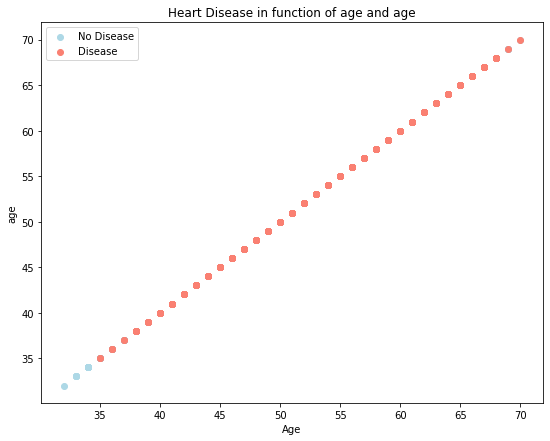

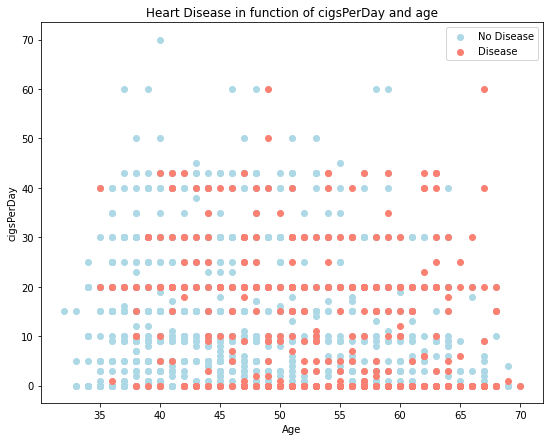

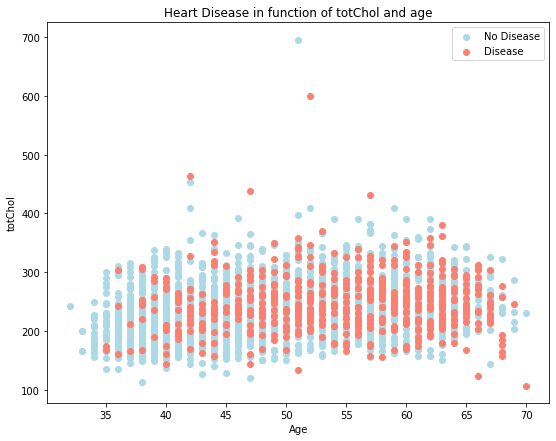

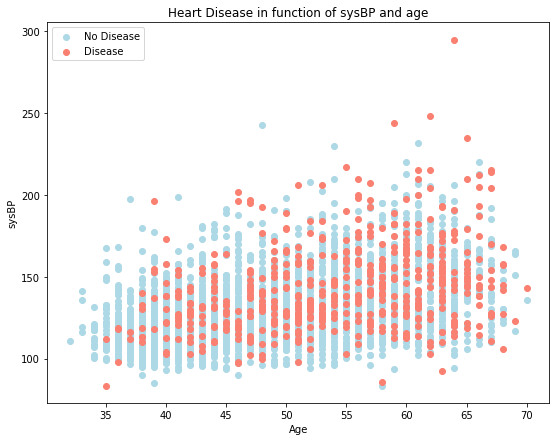

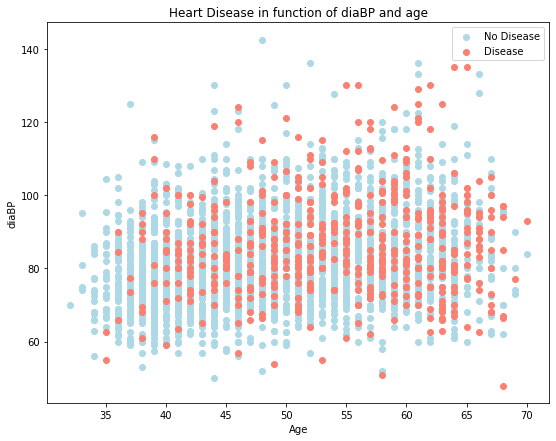

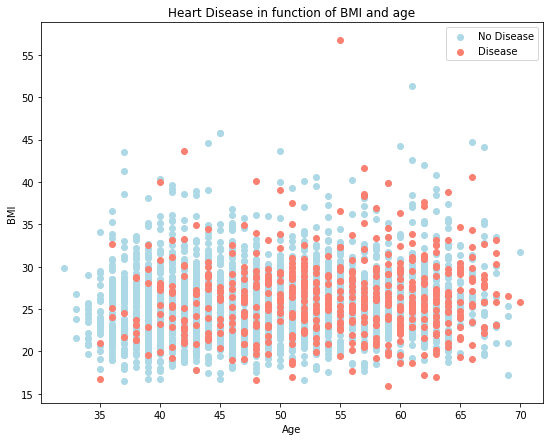

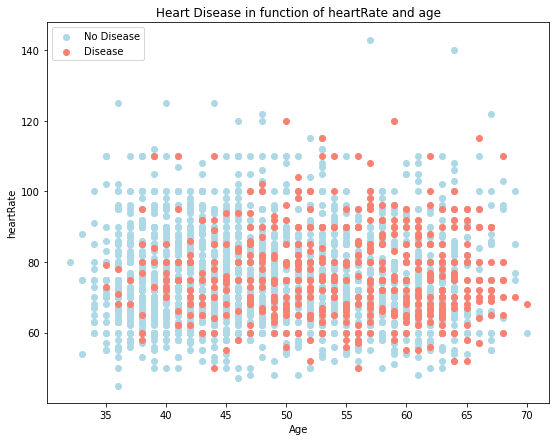

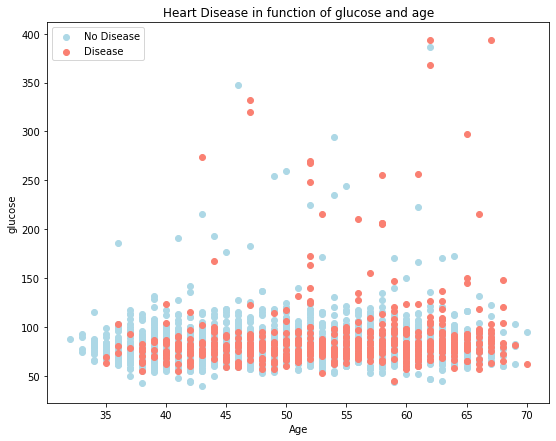

In [20]:
for col in continous_features:
  plt.figure(figsize=(9, 7))
  features = df[col]

  # Scatter with negative examples
  plt.scatter(df.age[df.TenYearCHD==0],
              features[df.TenYearCHD==0],
              c="lightblue")

  # Scatter with postivie examples
  plt.scatter(df.age[df.TenYearCHD==1],
              features[df.TenYearCHD==1],
              c="salmon")

  # Add some helpful info
  plt.title(f"Heart Disease in function of {col} and age")
  plt.xlabel("Age")
  plt.ylabel(col)
  plt.legend(["No Disease", "Disease"]);

##### 1. Why did you pick the specific chart?

To visualise which all features correlate with THD with respect to age.

##### 2. What is/are the insight(s) found from the chart?

Features like glucose, heart rate, sys BP, cigs per day, BMI show correlation to heart disease with respect to age.

#### Chart - 6

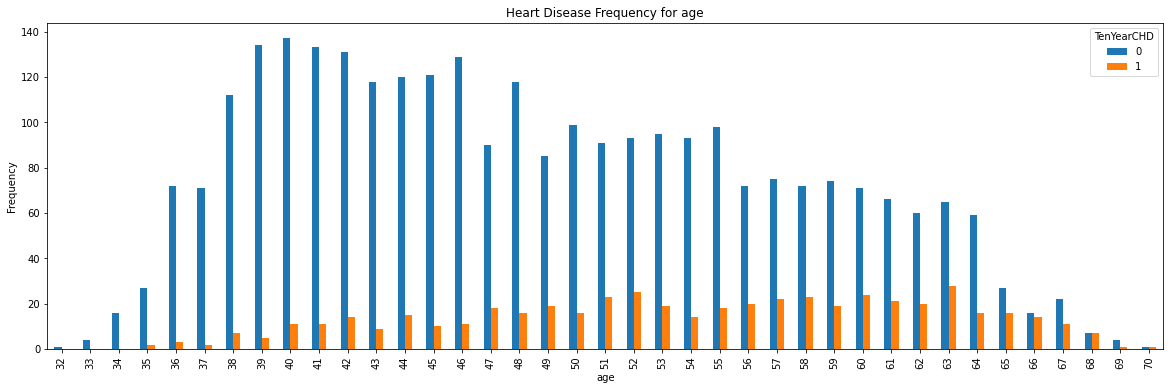

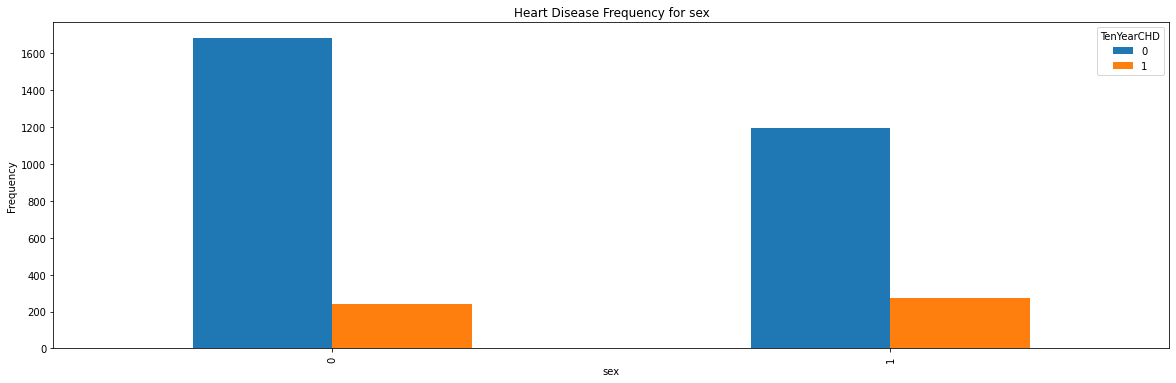

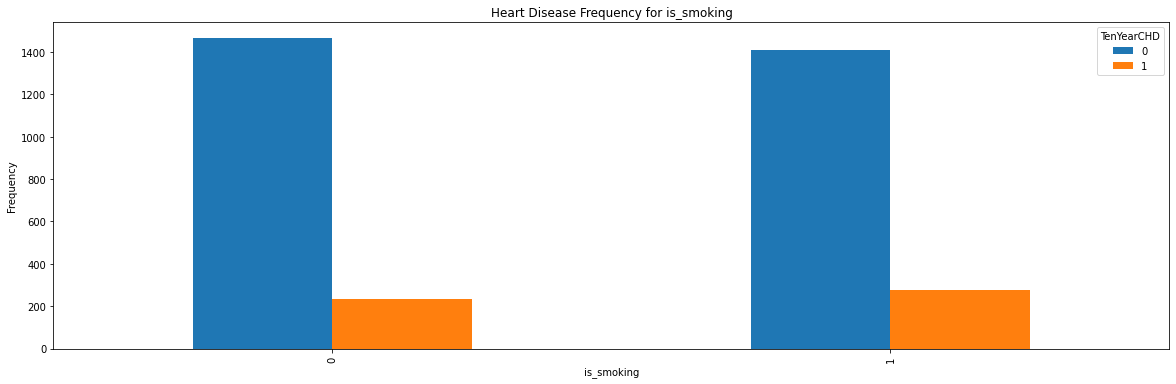

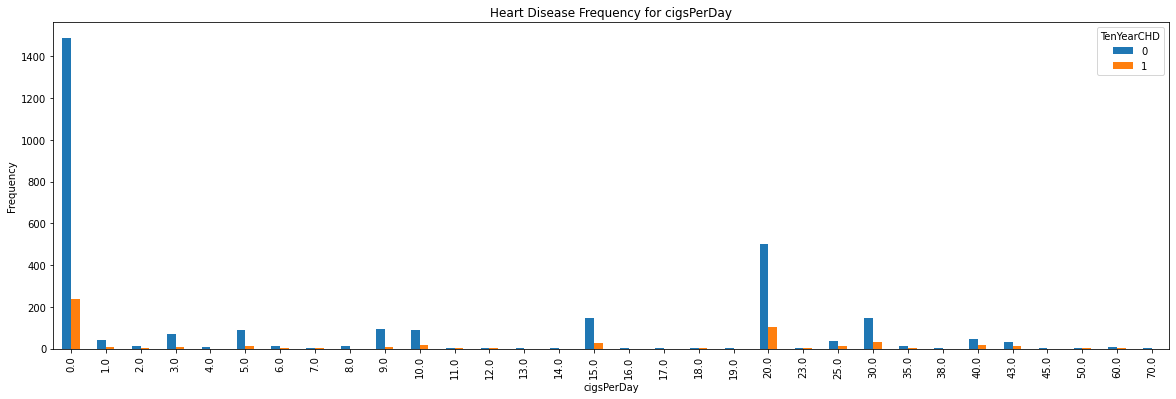

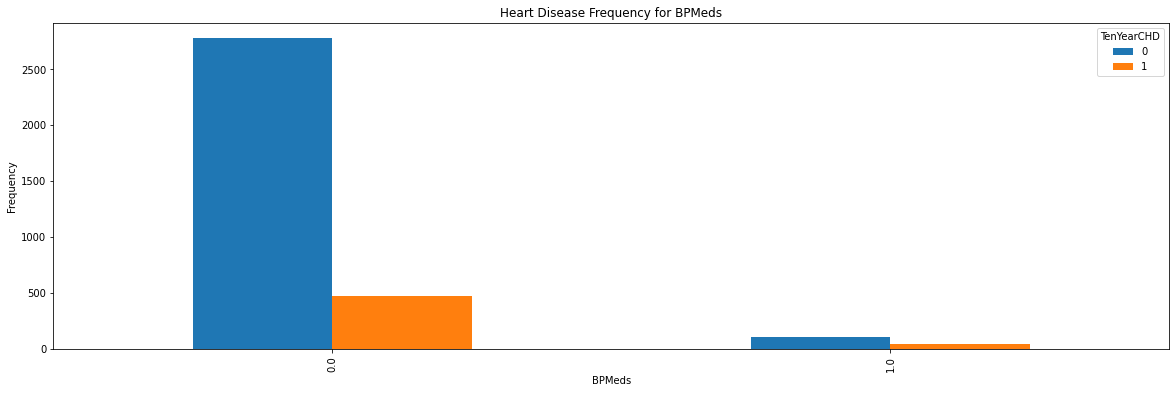

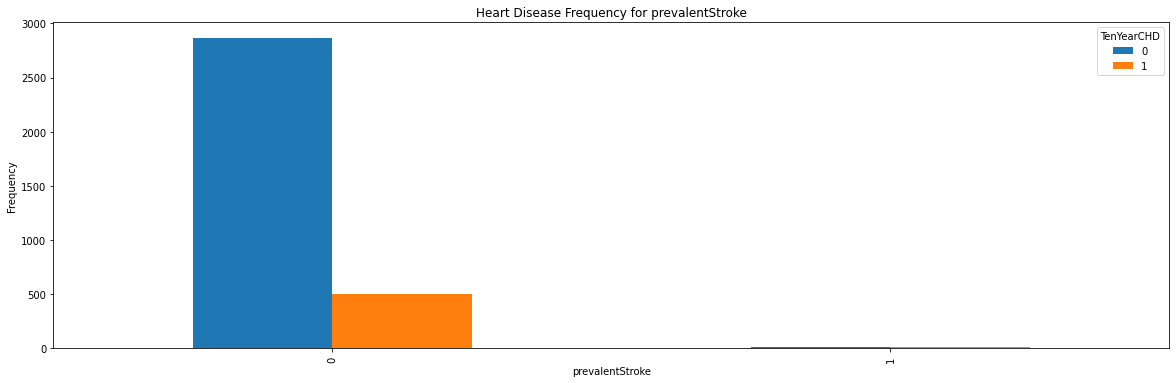

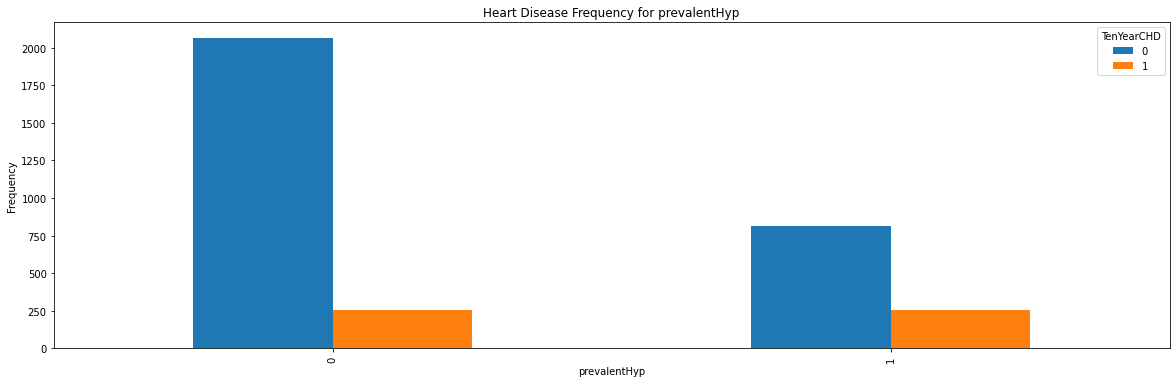

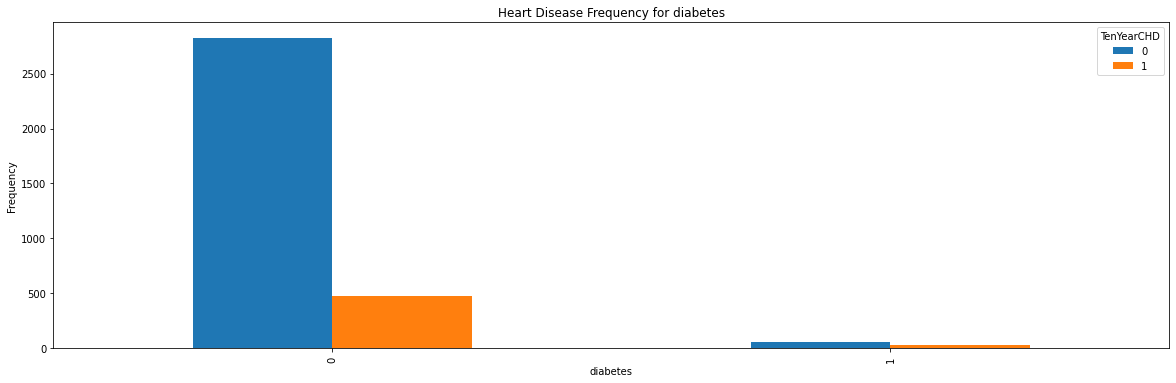

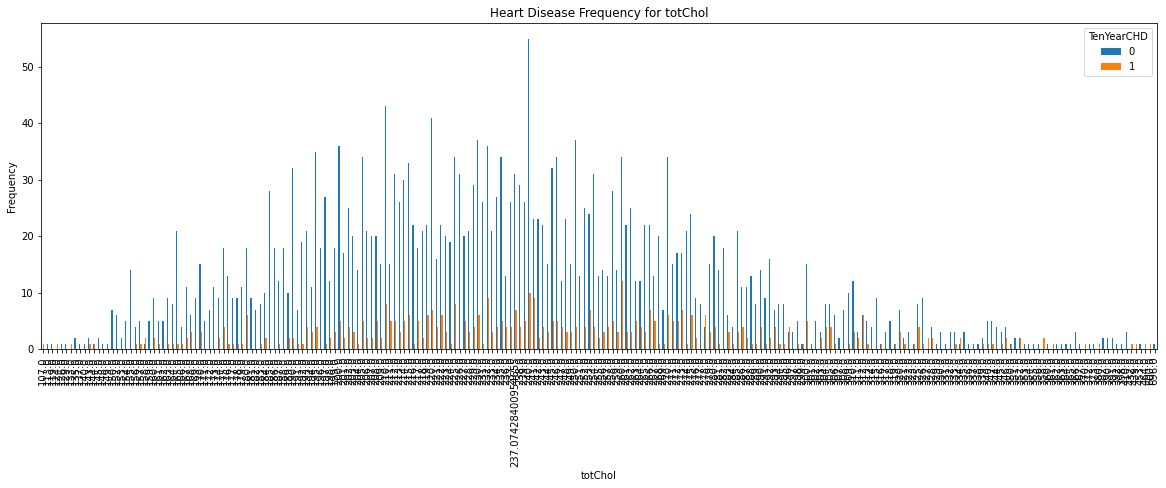

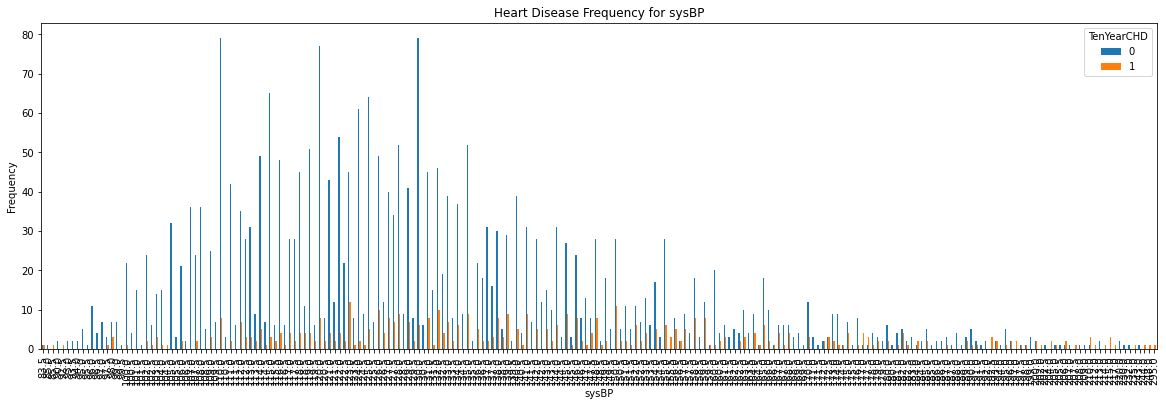

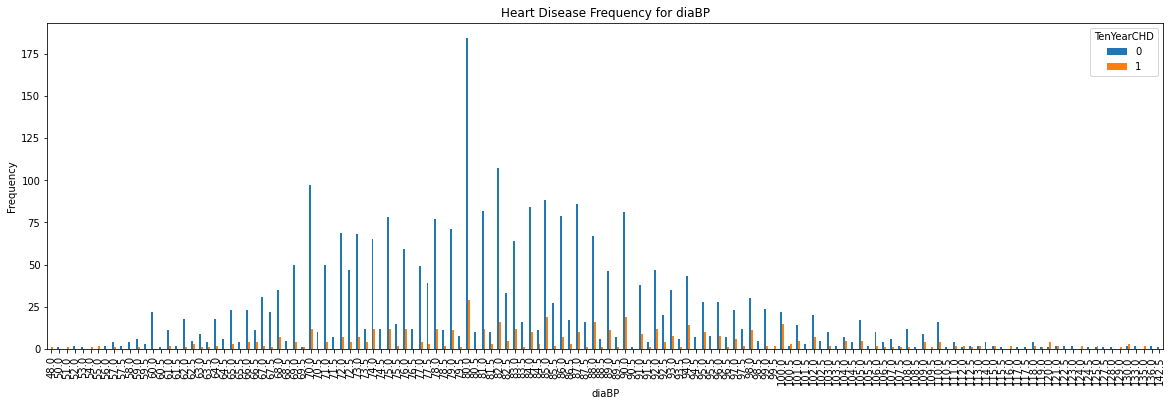

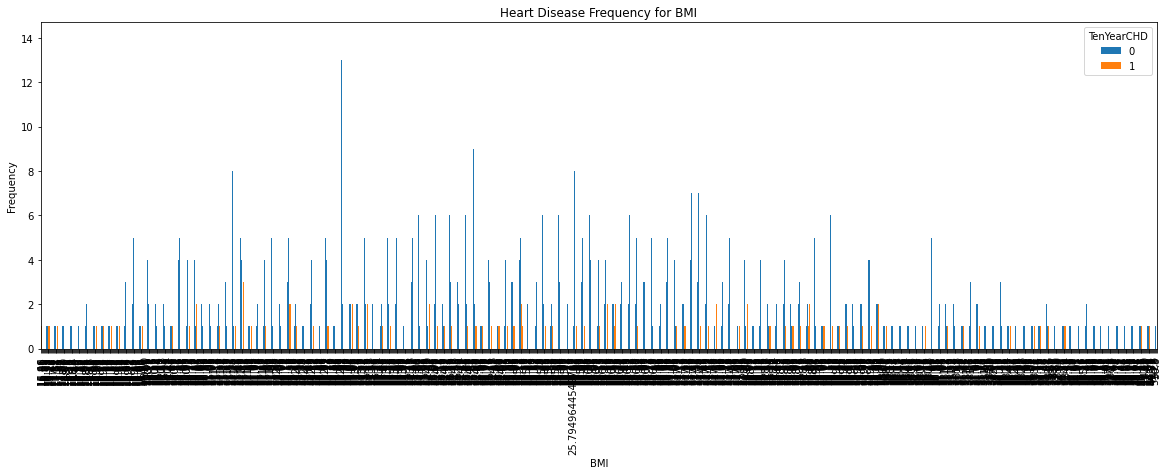

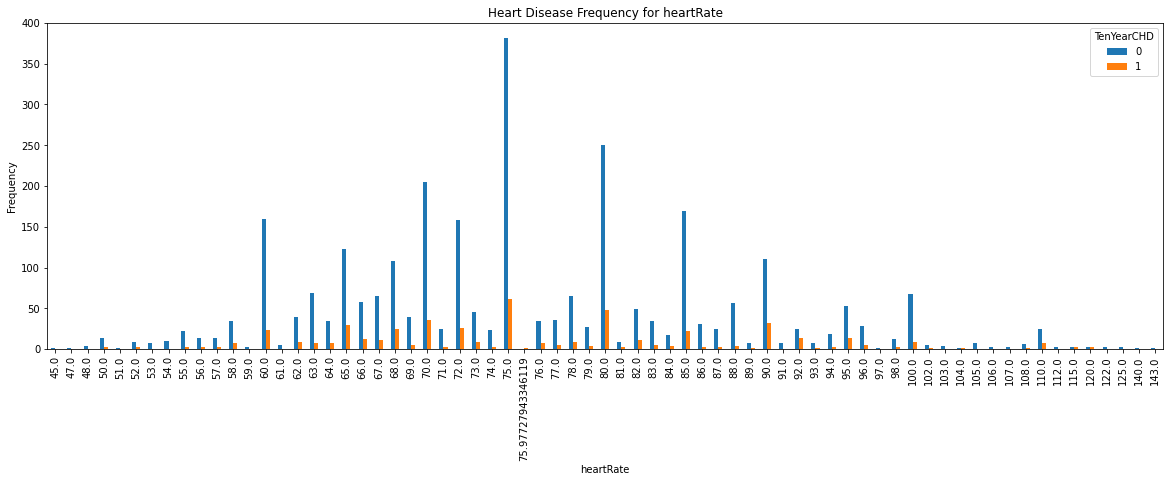

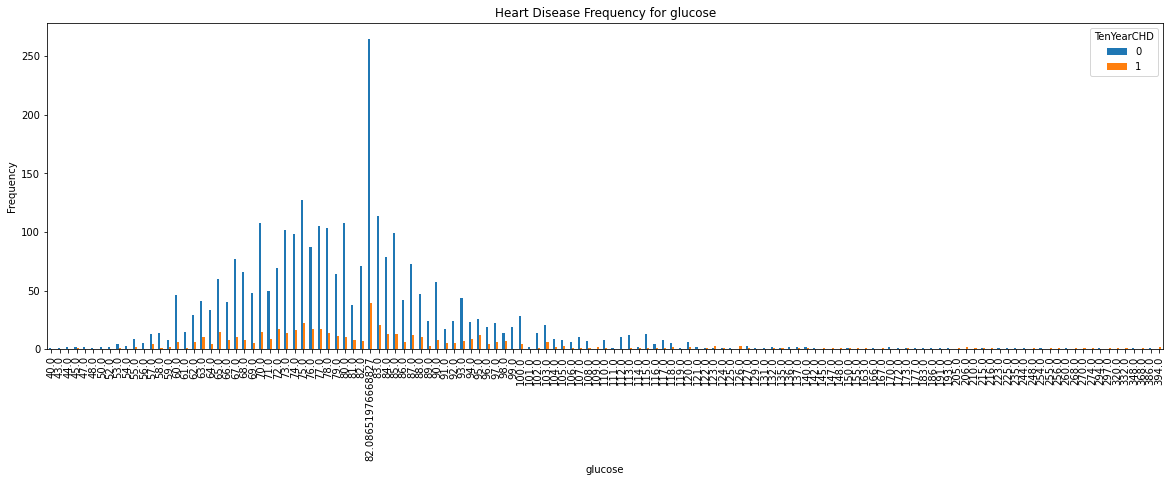

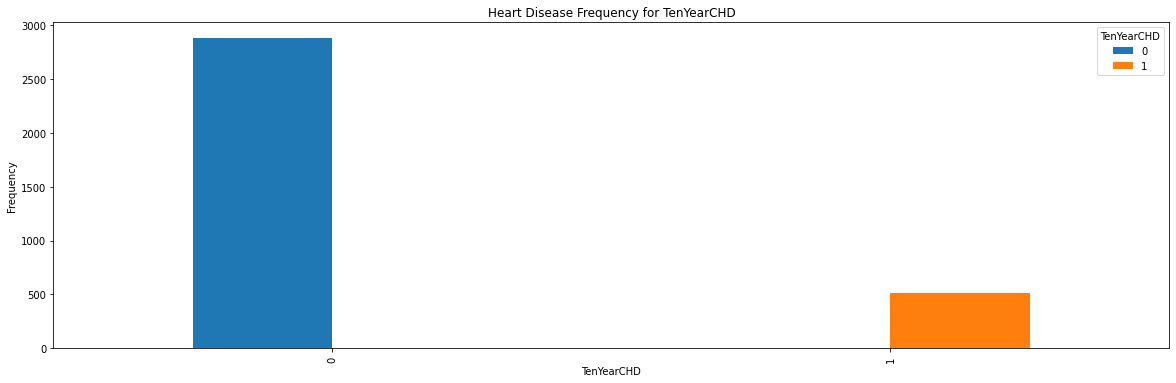

In [21]:
#checking heart disease frequency for all features
features = df.columns
for col in features:
  featuring = df[col]
  pd.crosstab(featuring,df.TenYearCHD).plot(kind="bar",figsize=(20,6),)
  plt.title(f'Heart Disease Frequency for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

##### 1. Why did you pick the specific chart?

To check the imbalanced features of the dataset.

##### 2. What is/are the insight(s) found from the chart?

Features like prevalent Hyp, diabetes, stroke are massively imbalanced with respect to Ten year CHD, so this might bring a bias if fitted in the model without any treatment.

#### Chart - 7

[Text(0, 0, '0 - 40'),
 Text(0, 0, '41 - 50'),
 Text(0, 0, '51 - 60'),
 Text(0, 0, '61 - 70')]

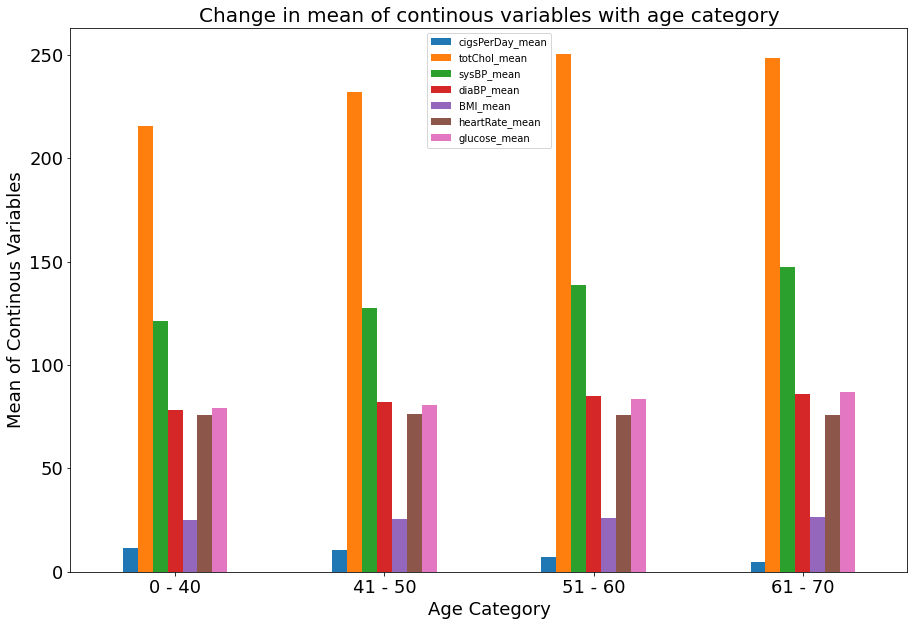

In [22]:
# making the relevant dataframe for our observation
continous_features = df[['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]
relevant_df = continous_features.copy()

# creating a function to convert age with age category
def replace_age_with_age_cat(df, col_name):
    df['age_cat'] = df[col_name].apply(lambda x : 0 if x <= 40 else (1 if 40 < x <= 50 else (2 if 50< x <= 60 else (3 if 60< x <= 70 else(4 if 70< x else 5)))))
    relevant_df.drop('age',axis =1,inplace=True)
    return df

# calling the above defined functions and doing data wrangling for our observation
relevant_df=replace_age_with_age_cat(relevant_df, 'age')
relevant_df = relevant_df.groupby(["age_cat"]).mean()
relevant_df = relevant_df.rename(columns = {'cigsPerDay':'cigsPerDay_mean',
                                            'totChol':'totChol_mean',
                                            'sysBP':'sysBP_mean',
                                            'diaBP':'diaBP_mean',
                                            'BMI':'BMI_mean',
                                            'heartRate':'heartRate_mean',
                                            'glucose':'glucose_mean'})

# Plotting our observations in a bargraph
plotting = relevant_df.plot.bar(figsize = (15,10),fontsize = 18)
plotting.set_title('Change in mean of continous variables with age category', fontsize = 20)
plotting.set_xlabel('Age Category', fontsize = 18)
plotting.set_ylabel('Mean of Continous Variables', fontsize = 18)
plotting.set_xticklabels(['0 - 40','41 - 50','51 - 60','61 - 70'],rotation=0) 


##### 1. Why did you pick the specific chart?

To identify which age group is more healthy and which is more prone to heart disease.

##### 2. What is/are the insight(s) found from the chart?

1. It is seen that 0-40 age group is the healthiest age group.
2. Features like glucose, Tot Cholesterol and sys BP increases with respect to age, which is logial. and hence people in older age group are more susceptible to heart disease.

#### Chart - 8

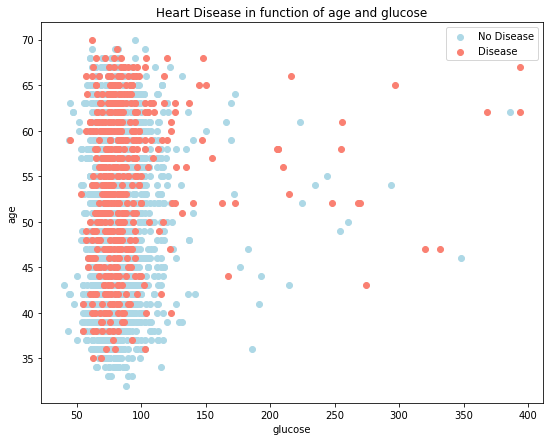

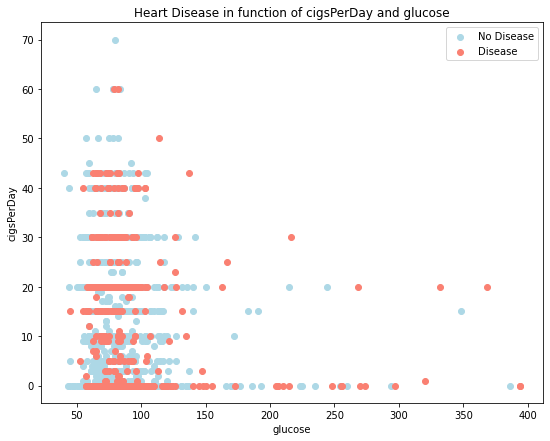

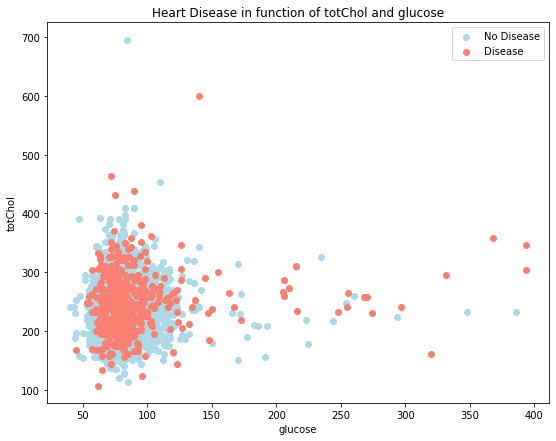

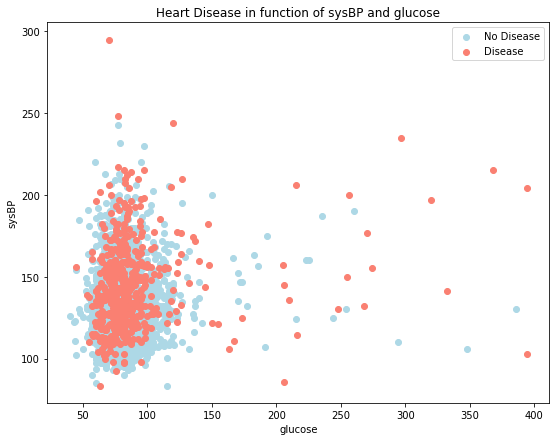

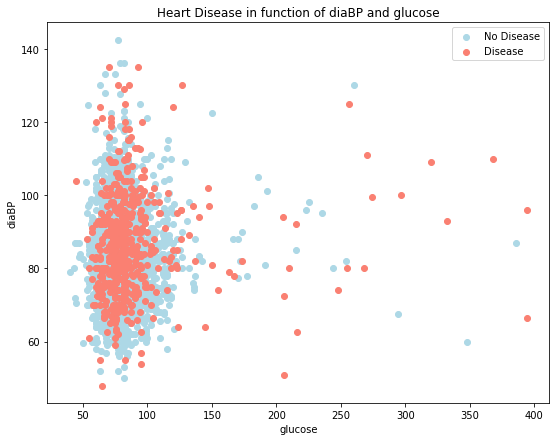

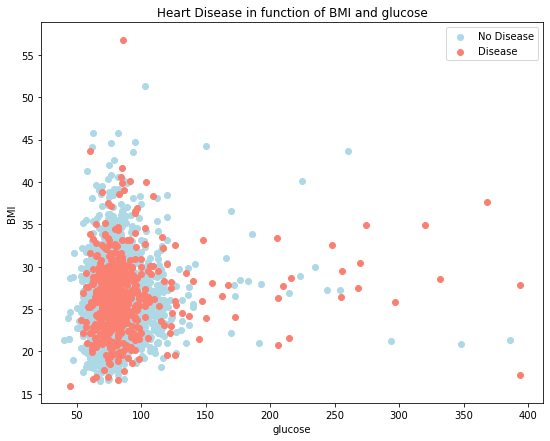

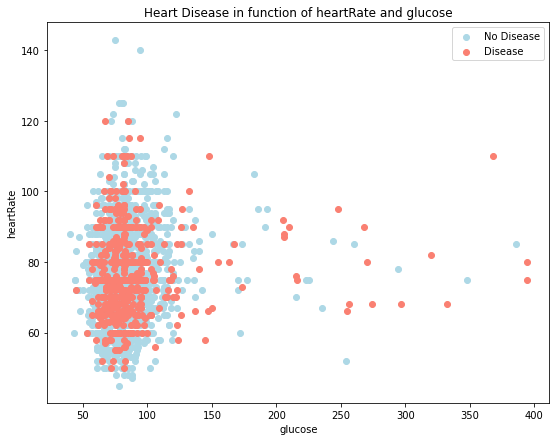

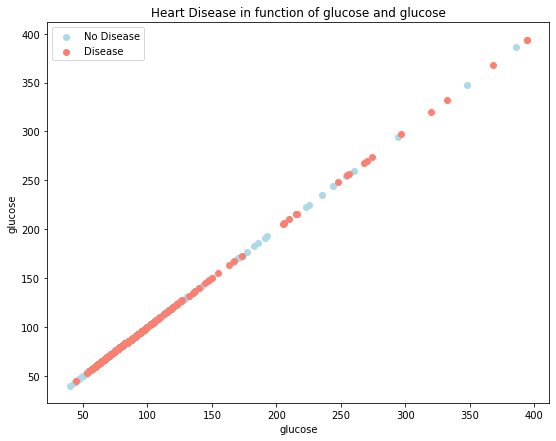

In [23]:
for col in continous_features:
  plt.figure(figsize=(9, 7))
  features = df[col]
  # Scatter with negative examples
  plt.scatter(df.glucose[df.TenYearCHD==0],
              features[df.TenYearCHD==0],
              c='lightblue')
  # Scatter with postivie examples
  plt.scatter(df.glucose[df.TenYearCHD==1],
              features[df.TenYearCHD==1],
              c='salmon')

  # Add some helpful info
  plt.title(f"Heart Disease in function of {col} and glucose")
  plt.xlabel("glucose")
  plt.ylabel(col)
  plt.legend(["No Disease", "Disease"]);

##### 1. Why did you pick the specific chart?

To visualise which all features in combination with glucose has more heart disease count.

##### 2. What is/are the insight(s) found from the chart?

Features like heartrate with glucose, BMI with glucose diaBP with glucose, sysBP with glucose, cholesterol with glucose has more heart disease counts.

#### Chart - 9

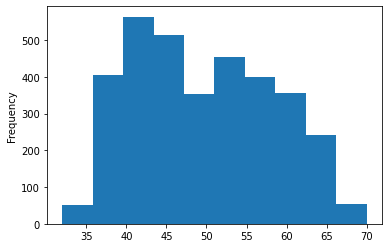

In [24]:
# checking the distribution of age in various age groups
df.age.plot.hist()

##### 1. Why did you pick the specific chart?

To check the overall age distribution of the population.

##### 2. What is/are the insight(s) found from the chart?

It was observed that the most people belong to the mid aged group, highest being around 40-45 years old.

#### Chart - 10

Text(0.5, 1.0, 'Percentage of CHD in different age groups')

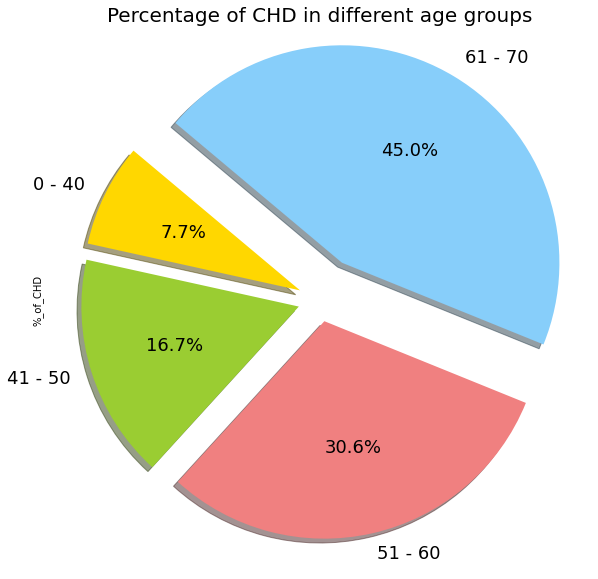

In [25]:
# making a copy of relevant features for our observation
relevant_df = df[['TenYearCHD','age']].copy()

# converting age with age category
relevant_df=replace_age_with_age_cat(relevant_df, 'age')

# grouping by the age category
relevant_df = relevant_df.groupby(["age_cat"]).agg(['count','sum'])

#dropping unneccesary data
relevant_df= relevant_df.droplevel(0,axis=1)

# converting dieases into percentage according to age category
relevant_df['%_of_CHD'] = ((relevant_df['sum']/relevant_df['count'])*100)
relevant_df1 = relevant_df['%_of_CHD'].copy()

# Specifying labels, colours and executing pie chart
labels = ['0 - 40','41 - 50','51 - 60','61 - 70']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.2)
plotting = relevant_df1.plot.pie(figsize = (15,10),fontsize = 18, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=140)
plotting.set_title('Percentage of CHD in different age groups', fontsize = 20)

##### 1. Why did you pick the specific chart?

To determine which age group has the highest CHD.

##### 2. What is/are the insight(s) found from the chart?

1. The age group of 61-70 had the highest percentage of CHD.
2. It was also observed that as the age group increased the CHD also incrased.

#### Chart - 11 - Correlation Heatmap

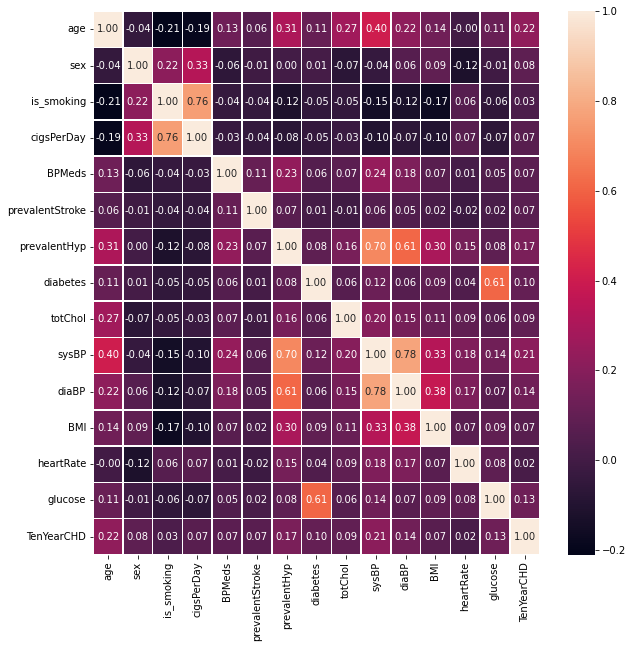

In [26]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f"
                 );

##### 1. Why did you pick the specific chart?

To check the correlation of all features with each other.

##### 2. What is/are the insight(s) found from the chart?

It is observed that there is a correlation between sys BP, dia BP with prevalent HP

#### Chart - 12 - Pair Plot 

In [27]:
# Pair Plot visualization code
sns.pairplot(df,hue = 'TenYearCHD')

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

To visualise the relation of a feature with other features.

##### 2. What is/are the insight(s) found from the chart?

1. It was observed that people with lower glucose and normal heart rate are not susceptible to heart disease.
2. Older people with sys BP around 200 are more susceptible to heart disease.
3. Dia BP and sys BP has a linear relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [28]:
#helper functions 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [29]:
#calculating variance
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
#creating instance of the class
findz = findz()
#creating a function 
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"


In [30]:
zcdf = lambda x: norm(0,1).cdf(x)
def p_value(z,tailed):
  z=zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Let's check if hypertension increases contributes to higher Blood pressure, as earlier let's set the cap for higher BP be 230 , which will be our null hypothesis and our alternate will be bloodpressure to be less than 230

In [31]:
# copying relevant features for our observations from main dataframe
relevant_df = df[['prevalentHyp','sysBP','diaBP']].copy()

# defining a function to change systolic BP and diastolic BP to a single column named BP
relevant_df['BP'] = relevant_df['sysBP'] + relevant_df['diaBP']
relevant_df.drop(columns = ['sysBP','diaBP'],inplace = True)

# choosing a random sample for testing
relevant_df = relevant_df.sample(frac=0.20)

# grouped the data in a manner so that no duplicate values will be there, duplicate vales have been taken care from the mean so we have one entry of duplicate value instead of many
relevant_df = pd.DataFrame(relevant_df.groupby(by = ['prevalentHyp','BP']).mean())

# dropping unnecesary data and resetting the index
relevant_df.drop(index=0,inplace=True)
relevant_df.reset_index(inplace = True)
relevant_df.drop(columns = 'prevalentHyp',inplace = True)
relevant_df.describe()

,BP
count,110.000000
mean,253.718182
std,33.726132
min,191.000000
25%,228.250000
50%,248.500000
75%,273.375000
max,368.000000


#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
hypothesis_mean = 230
size = relevant_df.count()
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = findz.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'l') #left tailed test
print(conclusion(p))

Failed to reject the Null Hypothesis for p = [1.].


##### Which statistical test have you done to obtain P-Value?

Z - score has been used to find the p-value

##### Why did you choose the specific statistical test?

We are dealing with mean and standard deviation could also be computed so z-score is the most relevant choice

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Let's check if people having heart diesease have BMI greater than 24.9, as more fat leads to more chances of heart diesease, i.e., null hypothesis is mean of BMI is greater than 24.9 and alternate hypothesis is mean of BMI is less than 24.9


In [33]:
# copying relevant features for our observations from main dataframe
relevant_df = df[['BMI','TenYearCHD']].copy()

# choosing a random sample
relevant_df = relevant_df.sample(frac=0.20)

# grouped the data in a manner so that no duplicate values will be there, duplicate vales have been taken care from the mean so we have one entry of duplicate value instead of many
relevant_df = pd.DataFrame(relevant_df.groupby(by = ['TenYearCHD','BMI']).mean())

# dropping unnecesary data and resetting the index
relevant_df.drop(index=0,inplace=True)
relevant_df.reset_index(inplace = True)
relevant_df.drop(columns = 'TenYearCHD',inplace = True)
relevant_df.describe()

,BMI
count,95.000000
mean,26.456842
std,5.243037
min,16.710000
25%,23.115000
50%,25.910000
75%,28.990000
max,56.800000


#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
hypothesis_mean = 24.9
size = relevant_df.count()
std = np.std(relevant_df)
sample_mean = np.mean(relevant_df)
z = findz.mean(hypothesis_mean,sample_mean,size,std)
p = p_value(z,'l') #left tailed test
print(conclusion(p))

Failed to reject the Null Hypothesis for p = [0.99819008].


##### Which statistical test have you done to obtain P-Value?

Z - score has been used to find the p-value

##### Why did you choose the specific statistical test?

We are dealing with mean and standard deviation could also be computed so z-score is the most relevant choice

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Let's check if atleast 20 percent people taking BP medicines have a previous record of heart disease or not

Null Hypothesis - People taking BP Medicine has a previous record of heart diesease is 20 percent

Alternate Hypothesis - People taking BP medicine has a previous record of heart diesease is more than 20 percent

In [35]:
# copying relevant features for our observations from main dataframe
relevant_df = df[['BPMeds','TenYearCHD']].copy()

# choosing a random sample
relevant_df = relevant_df.sample(frac=0.20)

# grouping the data in a manner such that we get 
relevant_df1 = pd.DataFrame(relevant_df.groupby(by = ['BPMeds']).sum())
relevant_df1.reset_index(inplace = True)
relevant_df.drop(columns = 'BPMeds',inplace = True)
relevant_df1

,BPMeds,TenYearCHD
0,0.0,92
1,1.0,6


#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
val = relevant_df1['TenYearCHD'][0]
p_hyp = 0.2
size = relevant_df.count()
p_sample = val/size

z = findz.proportion(p_sample,p_hyp,size)
p = p_value(z,'r') #right tailed
print(conclusion(p))

Failed to reject the Null Hypothesis for p = [0.99998581].


##### Which statistical test have you done to obtain P-Value?

Z - score has been used to find the p-value

##### Why did you choose the specific statistical test?

We are dealing with ratio's so z-score is the most relevant choice

## ***6. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int8   
 2   is_smoking       3390 non-null   int8   
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), int8(2)
memory usage: 506.4 KB


#### 1. Feature Manipulation

In [38]:
# Manipulate Features to minimize feature correlation and create new features

# function to change BMI to BMI category
def bmi_to_category(df, column):
    # Create a new column with the categories
    df['bmi_cat'] = pd.cut(df[column], bins=[0, 18.4, 24.9, 30, 100], labels=[0,1,2,3], right=False)
    return df

# function to change cholestrol to cholestrol category
def chol_tocat(df, column):
    # Create a new column with the categories
    df['totChol_cat'] = pd.cut(df[column], bins=[100,200,239,700], labels=[0,1,2], right=False)
    return df

# function to change heartrate to heartrate category
def heart_tocat(df, column):
    # Create a new column with the categories
    df['heartrate_cat'] = pd.cut(df[column], bins=[0,59,100,200], labels=[0,1,2], right=False)
    return df

# function to change age to age category
def age_to_cat(df, column):
    # Create a new column with the age range
    df['age_cat'] = pd.cut(df[column], bins=[30,40,50,60,70,80], labels=[0,1,2,3,4], right=False)
    return df

# function to replace systolic and diastolic BP with a BP category    
def BP_cat(df, column1, column2):
    df['BP'] = df[column1] + df[column2]
    # Create a new column with the age range
    df['BP_cat'] = pd.cut(df['BP'], bins=[0,150,230,500], labels=[0,1,2], right=False)
    return df

# calling the above created functions by passing neccesary columns
df = heart_tocat(df, 'heartRate')
df = chol_tocat(df,'totChol')
df = bmi_to_category(df, 'BMI')
df = age_to_cat(df, 'age')
df = BP_cat(df, 'sysBP', 'diaBP')

# converting 'BPMeds from float to int
df = df.astype({"BPMeds":'int'}) 
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,BMI,heartRate,glucose,TenYearCHD,heartrate_cat,totChol_cat,bmi_cat,age_cat,BP,BP_cat
0,64,0,1,3.0,0,0,0,0,221.0,148.0,...,25.794964,90.0,80.0,1,1,1,2,3,233.0,2
1,36,1,0,0.0,0,0,1,0,212.0,168.0,...,29.770000,72.0,75.0,0,1,1,2,0,266.0,2
2,46,0,1,10.0,0,0,0,0,250.0,116.0,...,20.350000,88.0,94.0,0,1,2,1,1,187.0,1
3,50,1,1,20.0,0,0,1,0,233.0,158.0,...,28.260000,68.0,94.0,1,1,1,2,2,246.0,2
4,64,0,1,30.0,0,0,0,0,241.0,136.5,...,26.420000,70.0,77.0,0,1,2,2,3,221.5,1


#### 2. Feature Selection

In [39]:
# Drop all the continous variables columns
df.drop(columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose','BP'],inplace=True)

##### What all feature selection methods have you used  and why?

All the continuous features were dropped as it would over fit the model.

##### Which all features you found important and why?

Features like is smoking, tot CHOL, BMI, age are the most important features for predicting heart disease because as per medical parameters people having abnormal numbers for these parameters are more susceptible to heart disease.

### 2. Categorical Encoding

In [40]:
# One Hot Encoding
df = pd.get_dummies(df, columns = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol_cat', 'age_cat', 'BP_cat', 'heartrate_cat', 'bmi_cat'])
df

,TenYearCHD,sex_0,sex_1,is_smoking_0,is_smoking_1,BPMeds_0,BPMeds_1,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,...,BP_cat_0,BP_cat_1,BP_cat_2,heartrate_cat_0,heartrate_cat_1,heartrate_cat_2,bmi_cat_0,bmi_cat_1,bmi_cat_2,bmi_cat_3
0,1,1,0,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,1,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0,1,0,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3386,0,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3387,1,0,1,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3388,0,0,1,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Looking at the target feature it 85% of the population doesn't have any heart disease, so if we do not trreat it and split the original dataset for training and testing the number of positive heart disease further goes down and the model won't be the best to predict heart disease as it will have very less information to train.

In [41]:
# dependent variable
X = df.drop(columns = 'TenYearCHD')
# independent variable
Y = df['TenYearCHD'].copy()

In [42]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,Y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Here we used SMOTE to handle the imbalance data because it scales up the minority class with respect to the majority class.  

### 3. Data Splitting

In [43]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 0)

# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(4606, 30) (4606,)
(1152, 30) (1152,)


##### What data splitting ratio have you used and why? 

We considered 80% data for training because the model needs more data to train and 20% data for testing.

## ***7. ML Model Implementation***

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def score(model, X_train, Y_train, X_test, Y_test, train):
    if train:
        pred = model.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

# Fit the Algorithm
classifier.fit(X_train, Y_train)

# Predict on the model
y_pred = classifier.predict(X_test)

# Making predictions on train and test data

print(classifier.predict(X_train))
print(classifier.predict(X_test))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [46]:
# evaluation Metric Score

score(classifier, X_train, Y_train, X_test, Y_test, train=True)
score(classifier, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 78.51%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.741854     0.849783  0.785063     0.795818      0.795279
recall        0.880911     0.687281  0.785063     0.784096      0.785063
f1-score      0.805425     0.759942  0.785063     0.782683      0.782910
support    2326.000000  2280.000000  0.785063  4606.000000   4606.000000
Confusion Matrix: 
 [[2049  277]
 [ 713 1567]]

Accuracy Score: 78.82%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.729569    0.870564  0.788194     0.800066      0.802881
recall       0.887884    0.696160  0.788194     0.792022      0.788194
f1-score     0.800979    0.773655  0.788194     0.787317      0.786771
support    553.000000  599.000000  0.788194  1152.000000   1152.000000
Confusion Matrix: 
 [[491  62]
 [182 417]]



#### 2. Cross- Validation & Hyperparameter Tuning

In [47]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
from sklearn.model_selection import GridSearchCV
params = {"C": np.logspace(-4, 4, 20),
          "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, Y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, Y_train)

score(lr_clf, X_train, Y_train, X_test, Y_test, train=True)
score(lr_clf, X_train, Y_train, X_test, Y_test, train=False)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'C': 1.623776739188721, 'solver': 'lbfgs'}
Train Result:
Accuracy Score: 78.51%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.741854     0.849783  0.785063     0.795818      0.795279
recall        0.880911     0.687281  0.785063     0.784096      0.785063
f1-score      0.805425     0.759942  0.785063     0.782683      0.782910
support    2326.000000  2280.000000  0.785063  4606.000000   4606.000000
Confusion Matrix: 
 [[2049  277]
 [ 713 1567]]

Accuracy Score: 78.82%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.729569    0.870564  0.788194     0.800066      0.802881
recall       0.887884    0.696160  0.788194     0.792022      0.788194
f1-score     0.800979    0.773655  0.788194     0.787317      0.786771
support    553.000000  599.000000  0.788194  1152.000000   1152.000000
Co

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there's a 1 percent imprvement in testing accuracy

### Random Forest

In [48]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,Y_train)

# Predict on the model
# Making predictions on train and test data

print(rf_model.predict(X_train))
print(rf_model.predict(X_test))


[0 0 0 ... 0 0 0]
[1 0 0 ... 1 0 0]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [49]:
# Visualizing evaluation Metric Score chart
score(rf_model, X_train, Y_train, X_test, Y_test, train=True)
score(rf_model, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 85.93%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.849292     0.870236  0.859314     0.859764      0.859660
recall        0.877042     0.841228  0.859314     0.859135      0.859314
f1-score      0.862944     0.855486  0.859314     0.859215      0.859252
support    2326.000000  2280.000000  0.859314  4606.000000   4606.000000
Confusion Matrix: 
 [[2040  286]
 [ 362 1918]]

Accuracy Score: 80.56%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.771901    0.842779  0.805556     0.80734      0.808755
recall       0.844485    0.769616  0.805556     0.80705      0.805556
f1-score     0.806563    0.804538  0.805556     0.80555      0.805510
support    553.000000  599.000000  0.805556  1152.00000   1152.000000
Confusion Matrix: 
 [[467  86]
 [138 461]]



#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [100,200,500, 900, 1100]

max_features = ['auto', 'sqrt']

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_features' : max_features}

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=1, scoring='accuracy')
# Fit the Algorithm
rf_grid.fit(X_train,Y_train)

rf_optimal_model = rf_grid.best_estimator_

# Predict on the model
print(rf_optimal_model.predict(X_train))
print(rf_optimal_model.predict(X_test))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0 0 0 ... 0 0 0]
[1 0 0 ... 1 0 0]


In [51]:
# Visualizing evaluation Metric Score chart
# Calculating accuracy on train and test
score(rf_optimal_model, X_train, Y_train, X_test, Y_test, train=True)
score(rf_optimal_model, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 85.93%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.846981     0.872943  0.859314     0.859962      0.859833
recall        0.880482     0.837719  0.859314     0.859100      0.859314
f1-score      0.863406     0.854969  0.859314     0.859188      0.859230
support    2326.000000  2280.000000  0.859314  4606.000000   4606.000000
Confusion Matrix: 
 [[2048  278]
 [ 370 1910]]

Accuracy Score: 80.38%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.772047    0.838475  0.803819     0.805261      0.806587
recall       0.839060    0.771285  0.803819     0.805173      0.803819
f1-score     0.804159    0.803478  0.803819     0.803819      0.803805
support    553.000000  599.000000  0.803819  1152.000000   1152.000000
Confusion Matrix: 
 [[464  89]
 [137 462]]



### KNN

In [52]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsClassifier
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
	clf = KNeighborsClassifier(n_neighbors = k)
	clf.fit(X_train, Y_train)

	training_score = clf.score(X_train, Y_train)
	test_score = clf.score(X_test, Y_test)
	K.append(k)

	training.append(training_score)
	test.append(test_score)
	scores[k] = [training_score, test_score]


In [53]:
# Making predictions on train and test data

print(clf.predict(X_train))
print(clf.predict(X_test))


[0 0 0 ... 0 0 0]
[1 0 0 ... 1 0 0]


In [54]:
# Visualizing evaluation Metric Score chart
score(clf, X_train, Y_train, X_test, Y_test, train=True)
score(clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 80.20%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.763217     0.856250  0.801997     0.809733      0.809269
recall        0.881341     0.721053  0.801997     0.801197      0.801997
f1-score      0.818037     0.782857  0.801997     0.800447      0.800623
support    2326.000000  2280.000000  0.801997  4606.000000   4606.000000
Confusion Matrix: 
 [[2050  276]
 [ 636 1644]]

Accuracy Score: 77.34%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.719880    0.846311  0.773438     0.783095      0.785620
recall       0.864376    0.689482  0.773438     0.776929      0.773438
f1-score     0.785538    0.759890  0.773438     0.772714      0.772202
support    553.000000  599.000000  0.773438  1152.000000   1152.000000
Confusion Matrix: 
 [[478  75]
 [186 413]]



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

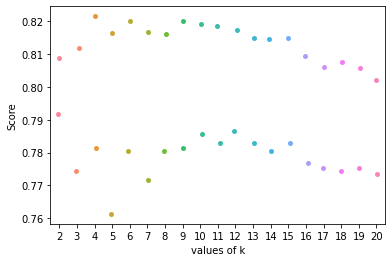

In [55]:
# Visualizing evaluation Metric Score chart
ax = sns.stripplot(K, training);
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Score')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train, Y_train)
    train_score.append(accuracy_score(Y_train, kn.predict(X_train)))
    test_score.append(accuracy_score(Y_test, kn.predict(X_test)))


Maximum KNN score on the train data: 82.50%
Maximum KNN score on the test data: 79.17%


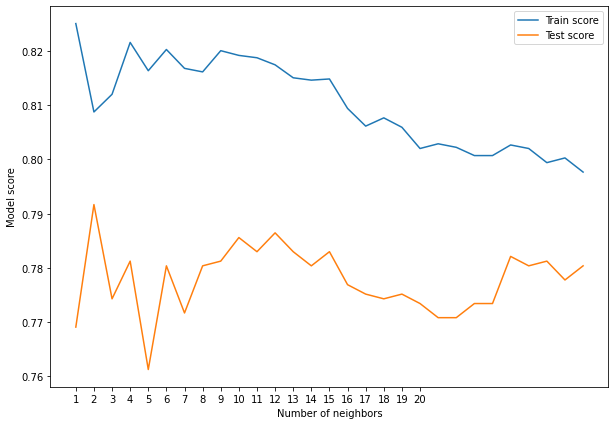

In [57]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")

plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the train data: {max(train_score)*100:.2f}%")
print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [58]:
# fitting best params
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, Y_train)

score(knn_clf, X_train, Y_train, X_test, Y_test, train=True)
score(knn_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 81.68%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.799031     0.837406  0.816761     0.818219      0.818027
recall        0.851247     0.781579  0.816761     0.816413      0.816761
f1-score      0.824313     0.808530  0.816761     0.816422      0.816500
support    2326.000000  2280.000000  0.816761  4606.000000   4606.000000
Confusion Matrix: 
 [[1980  346]
 [ 498 1782]]

Accuracy Score: 77.17%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.736156    0.812268  0.771701     0.774212      0.775732
recall       0.817360    0.729549  0.771701     0.773455      0.771701
f1-score     0.774636    0.768690  0.771701     0.771663      0.771544
support    553.000000  599.000000  0.771701  1152.000000   1152.000000
Confusion Matrix: 
 [[452 101]
 [162 437]]



### 1. Which ML model did you choose from the above created models as your final prediction model and why?

Random forst tuned with hyperparameter is the best model from the model's I have used

### 2. Explain the model which you have used and the feature importance using any model explainability tool?

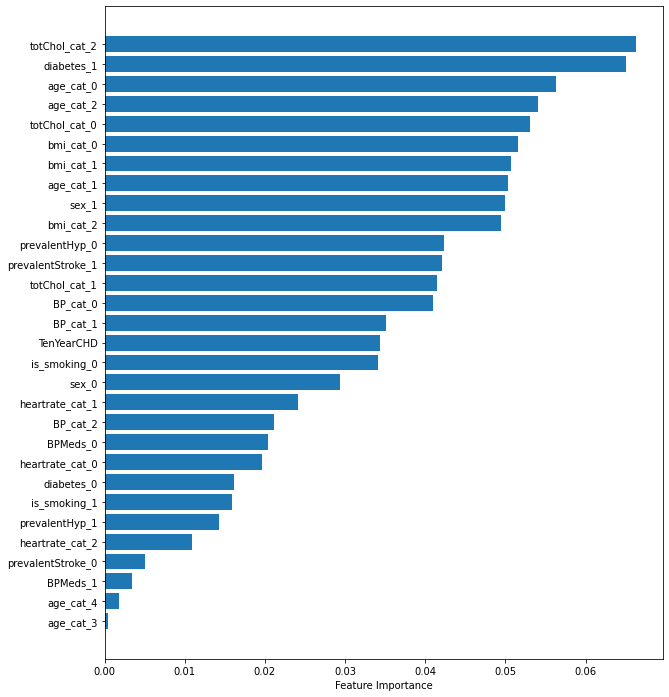

In [60]:
# Checking feature importance in the model
column_name = df.columns
sort = rf_optimal_model.feature_importances_.argsort()
plt.figure(figsize=(10, 12))
plt.barh(column_name[sort], rf_optimal_model.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()

## ***8.*** ***Future Work (Optional)***

In [61]:
# defining a function to take smooth user details and pass in ML model
def user_details():

  # all the parameters are set to 0 by default
  sex_0, sex_1, is_smoking_0, is_smoking_1, BPMeds_0 = 0,0,0,0,0
  BPMeds_1, prevalentStroke_0, prevalentStroke_1, prevalentHyp_0 = 0,0,0,0
  prevalentHyp_1, diabetes_0, diabetes_1, totChol_cat_0 = 0,0,0,0
  totChol_cat_1, totChol_cat_2, age_cat_0, age_cat_1, age_cat_2 = 0,0,0,0,0
  age_cat_3, age_cat_4, BP_cat_0, BP_cat_1, BP_cat_2 = 0,0,0,0,0
  heartrate_cat_0, heartrate_cat_1, heartrate_cat_2, bmi_cat_0 = 0,0,0,0
  bmi_cat_1, bmi_cat_2, bmi_cat_3 = 0,0,0

  # gender data input and conversion to relevant form
  gender = int(input('Put 1 if you are male, 0 if female  '))
  if gender == 0:
    sex_0 = 1
  elif gender ==1:
    sex_1 = 1
  else:
    print('invalid input')
  
  # Smoking data input and conversion to relevant form
  is_smoking = int(input('Put 1 if you smoke, 0 if not  '))
  if is_smoking ==0:
    is_smoking_0 = 1
  elif is_smoking == 1:
    is_smoking_1 = 1
  else:
    print('invalid input')
   
  # BP medicine data input and conversion to relevant form
  BPMeds = int(input('Put 1 if you take BP medicines, 0 if not  '))
  if BPMeds ==0:
    BPMeds_0 = 1
  elif BPMeds == 1:
    BPMeds_1 = 1
  else:
    print('invalid input')

  # Past Stroke data input and conversion to relevant form
  prevalentStroke = int(input('Put 1 if you had strokes in the past, 0 if not  '))
  if prevalentStroke == 0:
    prevalentStroke_0 = 1
  elif prevalentStroke == 1:
    prevalentStroke_1 = 1
  else:
    print('invalid input')

  # Past hypertension data input and conversion to relevant form
  prevalentHyp = int(input('Put 1 if you were diagnosed with hypertension in the past, 0 if not  '))
  if prevalentHyp == 0:
    prevalentHyp_0 = 1
  elif prevalentHyp == 1:
    prevalentHyp_1 = 1
  else:
    print('invalid input')

  # Diabetes data input and conversion to relevant form
  diabetes = int(input('Put 1 if you were diagnosed with diabetes in the past, 0 if not  '))
  if diabetes == 0:
    diabetes_0 = 1
  elif diabetes == 1:
    diabetes_1 = 1
  else:
    print('invalid input')

  # Cholestrol data input and conversion to relevant form
  totchol_cat = int(input('Put 0 if your cholestrol is in between 100 - 200, 1 if it is between 200 - 239 and 2 if it is above 239  '))
  if totchol_cat == 0:
    totchol_cat_0 = 1
  elif totchol_cat == 1:
    totchol_cat_1 = 1
  elif totchol_cat == 2:
    totchol_cat_2 = 1
  else:
    print('invalid input')

  # age data input and conversion to relevant form
  age_cat = int(input('Put 0 if your age is less than 40, 1 if it is between 41 - 50, 2 if it is between 51 - 60, 3 if it is between 61 - 70 and 4 if it is 71 and above  '))
  if age_cat == 0:
    age_cat_0 = 1
  elif age_cat == 1:
    age_cat_1 = 1
  elif age_cat == 2:
    age_cat_2 = 1
  elif age_cat == 3:
    age_cat_3 = 1
  elif age_cat == 4:
    age_cat_4 = 1    
  else:
    print('invalid input')

  # Blood Pressure data input and conversion to relevant form
  sysBP = float(input('What is your systolic BP?  '))
  diaBP = float(input('What is your diastolic BP?  '))
  BP = sysBP + diaBP
  if BP < 150:
    BP_cat_0 = 1
  elif BP > 150 and BP < 230:
    BP_cat_1 = 1
  elif BP > 230:
    BP_cat_2 = 1

  # Heartrate data input and conversion to relevant form
  heartrate_cat = int(input('Put 0 if your heartrate is in between 0 - 59, 1 if it is between 60 - 100 and 2 if it is above 100  '))
  if heartrate_cat == 0:
    heartrate_cat_0 = 1
  elif heartrate_cat == 1:
    heartrate_cat_1 = 1
  elif heartrate_cat == 2:
    heartrate_cat_2 = 1
  else:
    print('invalid input')

  # height and weight data input and conversion to relevant form
  height = float(input('Put your height in meters  '))
  weight = float(input('Put your weight in kilograms  '))
  bmi = weight/(height)**2
  if bmi < 18.4:
    bmi_cat_0 = 1
  elif bmi >= 18.4 and bmi < 24.9:
    bmi_cat_1 = 1
  elif bmi >= 24.9 and bmi < 30:
    bmi_cat_2 = 1
  elif bmi > 30:
    bmi_cat_3 = 1

  # Storing data into a list to pass in the model
  user_parameters = [sex_0, sex_1, is_smoking_0, is_smoking_1, BPMeds_0,
                       BPMeds_1, prevalentStroke_0, prevalentStroke_1, prevalentHyp_0,
                       prevalentHyp_1, diabetes_0, diabetes_1, totChol_cat_0,
                       totChol_cat_1, totChol_cat_2, age_cat_0, age_cat_1, age_cat_2,
                       age_cat_3, age_cat_4, BP_cat_0, BP_cat_1, BP_cat_2,
                       heartrate_cat_0, heartrate_cat_1, heartrate_cat_2, bmi_cat_0,
                       bmi_cat_1, bmi_cat_2, bmi_cat_3]
  return user_parameters


### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [62]:
# Save the File
model = rf_optimal_model.fit(X_train,Y_train)
import joblib
joblib.dump(model, 'model_joblib')

['model_joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [65]:
# Load the File and predict unseen data.
parameters = user_details()
joblib_model = joblib.load('model_joblib')
y = joblib_model.predict([parameters])

# Result of model
if int(y[0]) == 0:
  print('Hoorah!! you are fit and fine')
else:
  print('You might be in a risk of chronic heart disease, consult a doctor')

Put 1 if you are male, 0 if female  0
Put 1 if you smoke, 0 if not  1
Put 1 if you take BP medicines, 0 if not  1
Put 1 if you had strokes in the past, 0 if not  1
Put 1 if you were diagnosed with hypertension in the past, 0 if not  1
Put 1 if you were diagnosed with diabetes in the past, 0 if not  1
Put 0 if your cholestrol is in between 100 - 200, 1 if it is between 200 - 239 and 2 if it is above 239  2
Put 0 if your age is less than 40, 1 if it is between 41 - 50, 2 if it is between 51 - 60, 3 if it is between 61 - 70 and 4 if it is 71 and above  4
What is your systolic BP?  200
What is your diastolic BP?  100
Put 0 if your heartrate is in between 0 - 59, 1 if it is between 60 - 100 and 2 if it is above 100  2
Put your height in meters  1.45
Put your weight in kilograms  88
You might be in a risk of chronic heart disease, consult a doctor



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

It is safe to conclude that our data was highly imbalanced and the results thus generated are by including the synthetic data using SMOTE. So this algorithm could do a intution about the patient's heart disease situation which can help medical institution to determine which patient's to test and whom to not given they had a huge volume of patient's coming to examine

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***